In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [68]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [69]:
names = ["sepla-length","sepal-width","petal-length","petal-width","class"]

In [70]:
df = pd.read_csv(url,names=names)

In [71]:
df.head()

,sepla-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [72]:
X = df.iloc[:,0:-1]

In [73]:
X.head()

,sepla-length,sepal-width,petal-length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [74]:
y=df["class"]

In [75]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: class, dtype: object

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=21,test_size=0.2)

In [77]:
scaler = StandardScaler()

In [78]:
X_train = scaler.fit_transform(X_train)

In [79]:
X_test = scaler.transform(X_test)

In [80]:

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    print(i,knn.score(X_test,y_test))

1 0.9333333333333333
2 0.9666666666666667
3 0.9666666666666667
4 0.9333333333333333
5 0.9
6 0.9333333333333333
7 0.9
8 0.9333333333333333
9 0.9333333333333333
10 0.9666666666666667
11 0.9333333333333333
12 0.9333333333333333
13 0.9333333333333333
14 0.9666666666666667
15 0.9333333333333333
16 0.9
17 0.9
18 0.9
19 0.9333333333333333


In [92]:
error_rates = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rates.append({i:np.mean(pred_i!=y_test)})
print(error_rates)

[{1: 0.06666666666666667}, {2: 0.03333333333333333}, {3: 0.03333333333333333}, {4: 0.06666666666666667}, {5: 0.1}, {6: 0.06666666666666667}, {7: 0.1}, {8: 0.06666666666666667}, {9: 0.06666666666666667}, {10: 0.03333333333333333}, {11: 0.06666666666666667}, {12: 0.06666666666666667}, {13: 0.06666666666666667}, {14: 0.03333333333333333}, {15: 0.06666666666666667}, {16: 0.1}, {17: 0.1}, {18: 0.1}, {19: 0.06666666666666667}]


In [93]:
error_rate = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))
print(error_rate)

[0.06666666666666667, 0.03333333333333333, 0.03333333333333333, 0.06666666666666667, 0.1, 0.06666666666666667, 0.1, 0.06666666666666667, 0.06666666666666667, 0.03333333333333333, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.03333333333333333, 0.06666666666666667, 0.1, 0.1, 0.1, 0.06666666666666667]


Text(0, 0.5, 'Error rate')

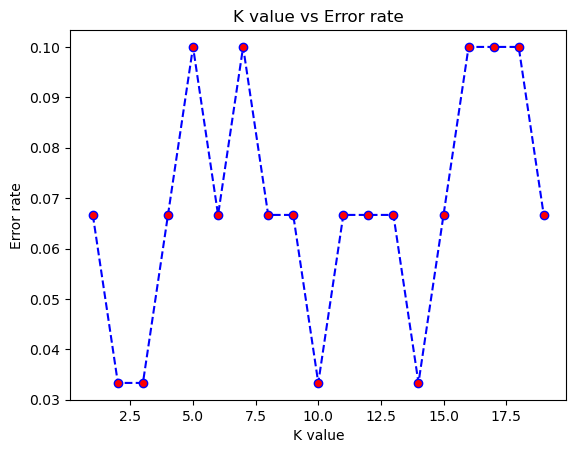

In [99]:
plt.plot(range(1,20),error_rate,color='b',linestyle="dashed",marker = 'o',markerfacecolor='r')
plt.title("K value vs Error rate")
plt.xlabel("K value")
plt.ylabel("Error rate")

In [100]:
#n=10

In [101]:
knn = KNeighborsClassifier(n_neighbors=10)

In [102]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [103]:
knn.score(X_test,y_test)

0.9666666666666667

In [104]:
y_pred = knn.predict(X_test)

In [105]:
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [106]:
cm = confusion_matrix(y_test,y_pred)

In [107]:
cm

array([[11,  0,  0],
       [ 0, 12,  0],
       [ 0,  1,  6]], dtype=int64)

In [108]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.92      1.00      0.96        12
 Iris-virginica       1.00      0.86      0.92         7

       accuracy                           0.97        30
      macro avg       0.97      0.95      0.96        30
   weighted avg       0.97      0.97      0.97        30

